# Team 1 - Scacrity and Popularity Pilot Study Analysis

In [40]:
import sqlite3
import os
import pandas as pd
import seaborn as sns

## Merge Datasets

In [41]:
current_dir = os.getcwd()

file_name1 = "Cleaned_Datasets/post-intervention_response_0518_filled.csv"
file_name2 = "Cleaned_Datasets/task_cleaned.csv"

file_path1 = os.path.join(current_dir, file_name1)
file_path2 = os.path.join(current_dir, file_name2)

In [42]:
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [43]:
print(df1.columns)
print(df2.columns)

Index(['Participant Private ID', 'randomiser-7gnq', '1. Age object-3 Response',
       '2. Gender object-4 Response', '3. Hispanic/Latino object-6 Response',
       '4. Identify Race object-8 Response',
       '5. Level of Education object-15 Response',
       '6. Income object-10 Response', '7. Location object-11 Response',
       '8. How often object-12 Response', 'perceived_decision_pressure',
       'perceived_authenticity_of_product', 'perceived_cue_influence',
       'decision_confidence', 'perceived_manipulativeness'],
      dtype='object')
Index(['Participant_ID', 'Condition', 'Context', 'Product', 'Payment',
       'Intent', 'Value', 'Trust'],
      dtype='object')


In [44]:
column_mapping_post = {
    "Participant Private ID": "Participant_ID",
    "randomiser-7gnq": "cue",
    "1. Age object-3 Response": "age",
    "2. Gender object-4 Response": "gender",
    "3. Hispanic/Latino object-6 Response": "hispanic",
    "4. Identify Race object-8 Response": "race",
    "5. Level of Education object-15 Response": "education",
    "6. Income object-10 Response": "income",
    "7. Location object-11 Response": "location",
    "8. How often object-12 Response": "shoppingfreq",
}

df1.rename(columns=column_mapping_post, inplace=True)

In [45]:
product_response_mapping = {
    "Payment": "wtp",  # willingness to pay
    # recoded Likert scores
    "Intent": "purchase_intent_score",  # Likert（1–5）
    "Value": "value_score",            # Likert（1–5）
    "Trust": "trust_score"             # Likert（1–7）
}

In [46]:
df2.rename(columns={"Participant Private ID": "Participant_ID"}, inplace=True)

df2 = df2.rename(columns=product_response_mapping)
df2

,Participant_ID,Condition,Context,Product,wtp,purchase_intent_score,value_score,trust_score
0,13397789,both,hedonic,chocolate,20.0,2,3,5
1,13397789,both,hedonic,headphones,95.0,4,4,5
2,13397789,both,utilitarian,chocolate,20.0,3,3,4
3,13397789,both,utilitarian,headphones,68.0,2,4,5
4,13397990,scarcity,hedonic,chocolate,25.0,2,3,3
...,...,...,...,...,...,...,...,...
151,13445452,both,utilitarian,headphones,20.0,4,3,2
152,13449082,none,hedonic,chocolate,13.0,1,1,4
153,13449082,none,hedonic,headphones,25.0,3,3,4
154,13449082,none,utilitarian,chocolate,10.0,2,1,4


In [47]:
conn = sqlite3.connect("experiment.db")

df1.to_sql("post", conn, if_exists="replace", index=False)
df2.to_sql("product", conn, if_exists="replace", index=False)

156

In [48]:
query = """
SELECT *
FROM post
LEFT JOIN product
ON post.Participant_ID = product.Participant_ID
"""

df_merged = pd.read_sql(query, conn)

conn.close()

In [49]:
df_merged

,Participant_ID,cue,age,gender,hispanic,race,education,income,location,shoppingfreq,...,decision_confidence,perceived_manipulativeness,Participant_ID,Condition,Context,Product,wtp,purchase_intent_score,value_score,trust_score
0,13397789.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,4,3,13397789.0,both,hedonic,chocolate,20.0,2.0,3.0,5.0
1,13397789.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,4,3,13397789.0,both,hedonic,headphones,95.0,4.0,4.0,5.0
2,13397789.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,4,3,13397789.0,both,utilitarian,chocolate,20.0,3.0,3.0,4.0
3,13397789.0,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,4,3,13397789.0,both,utilitarian,headphones,68.0,2.0,4.0,5.0
4,13397990.0,Scarcity,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","$20,000–$39,999",Yes,Multiple times a week,...,6,6,13397990.0,scarcity,hedonic,chocolate,25.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,13445452.0,P+S,25–34 years old,Male,No,White,"Doctorate or professional degree (e.g., PhD, J...","$80,000–$99,999",Yes,About once a month,...,4,5,13445452.0,both,utilitarian,headphones,20.0,4.0,3.0,2.0
154,13449082.0,No Cue,18–24 years old,Female,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",No,2–3 times a month,...,7,5,13449082.0,none,hedonic,chocolate,13.0,1.0,1.0,4.0
155,13449082.0,No Cue,18–24 years old,Female,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",No,2–3 times a month,...,7,5,13449082.0,none,hedonic,headphones,25.0,3.0,3.0,4.0
156,13449082.0,No Cue,18–24 years old,Female,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",No,2–3 times a month,...,7,5,13449082.0,none,utilitarian,chocolate,10.0,2.0,1.0,4.0


In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Participant_ID                     158 non-null    float64
 1   cue                                158 non-null    object 
 2   age                                158 non-null    object 
 3   gender                             158 non-null    object 
 4   hispanic                           158 non-null    object 
 5   race                               158 non-null    object 
 6   education                          158 non-null    object 
 7   income                             158 non-null    object 
 8   location                           158 non-null    object 
 9   shoppingfreq                       158 non-null    object 
 10  perceived_decision_pressure        158 non-null    int64  
 11  perceived_authenticity_of_product  158 non-null    int64  

In [51]:
df_merged.to_csv('pilot_study.csv', index=False)

# Stats Models

In [56]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def plot_coef_effect_points(dv, data):
    data = data[data["Context"].isin(["hedonic", "utilitarian"])].copy()

    formula = f"{dv} ~ cue * Context"
    model = smf.ols(formula, data=data).fit()

    print(f"\n{'='*20} OLS Summary for {dv} {'='*20}")
    print(model.summary())

    summary_df = model.summary2().tables[1].reset_index()
    summary_df.columns = ['term', 'coef', 'std_err', 't', 'p', '[0.025', '0.975]']

    filtered = summary_df[summary_df['term'].str.contains("cue|Context")]
    filtered = filtered[~filtered['term'].str.contains("Intercept")]

    def extract_types(term):
        cue = "No Cue"
        prod = "hedonic"
        if "cue[T." in term:
            cue = term.split("cue[T.")[-1].split("]")[0]
        if "Context[T." in term:
            prod = term.split("Context[T.")[-1].split("]")[0]
        return pd.Series([cue, prod])

    filtered[['Cue', 'ProductType']] = filtered['term'].apply(extract_types)

    baseline = pd.DataFrame({
        'term': ['Intercept'],
        'coef': [model.params['Intercept']],
        'std_err': [model.bse['Intercept']],
        'p': [model.pvalues['Intercept']],
        'Cue': ['No Cue'],
        'ProductType': ['hedonic']
    })

    coef_df = pd.concat([baseline, filtered[['term', 'coef', 'std_err', 'p', 'Cue', 'ProductType']]], ignore_index=True)

    coef_df['label'] = coef_df['coef'].round(2).astype(str) + coef_df['p'].apply(lambda p: '*' if p < 0.05 else '')
    coef_df['err'] = coef_df['std_err']

    cue_order = ['Scarcity', 'Popularity', 'P+S', 'No Cue']
    coef_df['Cue'] = pd.Categorical(coef_df['Cue'], categories=cue_order, ordered=True)
    coef_df = coef_df.sort_values(by='Cue', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    for i, prod_type in enumerate(['hedonic', 'utilitarian']):
        sub = coef_df[coef_df["ProductType"] == prod_type]
        y_pos = np.arange(len(sub))

        axes[i].errorbar(sub['coef'], y_pos, xerr=sub['err'], fmt='o', color='black', capsize=5)
        axes[i].axvline(0, color='red', linestyle='--')
        axes[i].set_yticks(y_pos)
        axes[i].set_yticklabels(sub['Cue'])
        axes[i].set_title(prod_type.capitalize())
        axes[i].set_xlabel("Coefficient")

    axes[0].set_ylabel("Cue Type")
    fig.suptitle(f"Cue × ProductType Effect on {dv}\nR² = {model.rsquared:.2f}, Adj R² = {model.rsquared_adj:.2f}, N = {len(data)}", fontsize=14)
    plt.tight_layout()
    plt.show()


### 3.1 Effects of Persuasive Cues and Product Type on Willingness to Pay (WTP) (wtp ~ cue * ProductType)

The first set of hypotheses focused on the main and interactive effects of persuasive design cues and product type on participants’ **willingness to pay (WTP)**.

- **Hypothesis 1 (H1)** proposed that **scarcity cues** would increase WTP across product types.
- **Hypothesis 2 (H2)** proposed that **popularity cues** would also increase WTP.
- **Hypothesis 3 (H3)** suggested that the combined use of both cues (Scarcity + Popularity) would result in the strongest increase in WTP.
- **Hypotheses 5a and 5b (H5a, H5b)** proposed moderation effects by product type: specifically, that **scarcity would be more effective for hedonic products** (H5a), while **popularity would be more effective for utilitarian products** (H5b).

To test these hypotheses, we conducted an Ordinary Least Squares (OLS) regression using cue type, product type, and their interaction as predictors of WTP. The model took the form:

\[
\text{WTP} \sim \text{cue} \times \text{ProductType}
\]

The overall model was **not statistically significant**, \( R^2 = 0.10 \), \( \text{Adjusted } R^2 = 0.02 \), \( F(7, 84) = 1.31 \), \( p = 0.257 \), indicating that the cue and product type variables collectively explained only a small portion of the variance in WTP.

Examining individual coefficients:

- **Scarcity cues** were associated with a *decrease* in WTP relative to the no-cue baseline in the hedonic condition (\( \beta = -19.68 \), \( p = 0.227 \)). This runs contrary to H1, which predicted an increase.
- **Popularity cues** (\( \beta = -5.25 \), \( p = 0.757 \)) and **combined cues (P+S)** (\( \beta = -5.03 \), \( p = 0.749 \)) also did not produce significant increases, providing no support for H2 or H3.
- Participants showed **lower baseline WTP for utilitarian products** compared to hedonic ones (\( \beta = -26.10 \), \( p = 0.126 \)), though this difference was not significant.
- None of the interaction terms between cue and product type reached significance, including:
  - Scarcity × Utilitarian (\( \beta = +11.23 \), \( p = 0.625 \))
  - Popularity × Utilitarian (\( \beta = +2.65 \), \( p = 0.912 \))
  - P+S × Utilitarian (\( \beta = +6.03 \), \( p = 0.786 \))

These results suggest that, contrary to expectations, persuasive cues did not significantly enhance participants’ valuation of the products, regardless of the type of cue or product. The direction of the coefficients even points toward a potential **boomerang effect**, where scarcity cues *reduced* WTP in hedonic contexts. However, due to wide confidence intervals and limited statistical power, these patterns should be interpreted with caution.

> Taken together, these findings provide **no empirical support** for H1–H3 or H5a–b within the context of self-purchase. Further research with expanded sample sizes and inclusion of gift contexts is needed to fully evaluate H4 (cue × purchase context interactions).


==================== OLS Summary for wtp ====================
                            OLS Regression Results                            
Dep. Variable:                    wtp   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.061
Date:                Sun, 18 May 2025   Prob (F-statistic):             0.0513
Time:                        15:25:17   Log-Likelihood:                -780.99
No. Observations:                 156   AIC:                             1578.
Df Residuals:                     148   BIC:                             1602.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

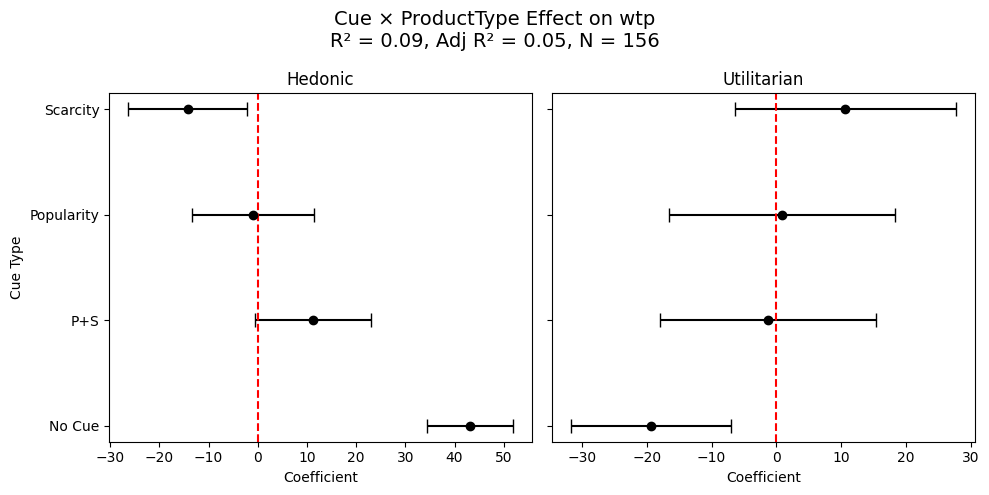

In [57]:
plot_coef_effect_points("wtp", df_merged)

### 3.2 Effects of Persuasive Cues and Product Type on Trust (trust_score ~ cue * ProductType)

This analysis investigated how persuasive design cues and product type affect **consumer trust**, operationalized via a 7-point Likert scale (`trust_score`).

The model showed **modest improvement in fit compared to WTP**, with \( R^2 = 0.13 \), \( \text{Adjusted } R^2 = 0.06 \), and an overall marginal model significance, \( F(7, 84) = 1.85 \), \( p = 0.089 \). This suggests that the combination of cue and product type variables explained a small but potentially meaningful portion of the variance in trust scores.

Key findings include:

- **Popularity cues** yielded a positive effect on trust relative to no-cue baseline in the hedonic condition (\( \beta = 0.80 \)), though not statistically significant (\( p = 0.167 \)). This trend provides weak support for **H2**.
- **Scarcity cues** also produced a numerically positive but non-significant effect on trust (\( \beta = 0.40 \), \( p = 0.468 \)), offering **limited support for H1**.
- The **combined cue (P+S)** had a negligible effect (\( \beta = -0.03 \), \( p = 0.957 \)), not supporting **H3**.
- The **main effect of ProductType** was negative (\( \beta = -0.40 \), \( p = 0.487 \)), indicating slightly lower trust for utilitarian products, but this was also not significant.
- No interaction effects between cue and product type were statistically significant, although the direction of coefficients (e.g., **Popularity × Utilitarian: \( \beta = 0.70 \)**) is consistent with **H5b**, albeit non-significant.

The coefficient plot visually confirms that:
- Popularity cues tended to elevate trust scores across both product types, especially for utilitarian products.
- Scarcity cues had mixed effects depending on product type.
- Confidence intervals across all conditions include zero, reinforcing the lack of statistical significance.

> In summary, the results provide **partial directional support** for Hypothesis 2 (Popularity → Trust), but no significant evidence for H1, H3, H5a, or H5b. These findings suggest that persuasive cues may shape perceptions of trust in some contexts, but the effects are subtle and potentially moderated by other unmeasured factors. Further study is needed to establish robustness.


==================== OLS Summary for trust_score ====================
                            OLS Regression Results                            
Dep. Variable:            trust_score   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.353
Date:                Sun, 18 May 2025   Prob (F-statistic):             0.0263
Time:                        15:25:32   Log-Likelihood:                -254.45
No. Observations:                 156   AIC:                             524.9
Df Residuals:                     148   BIC:                             549.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

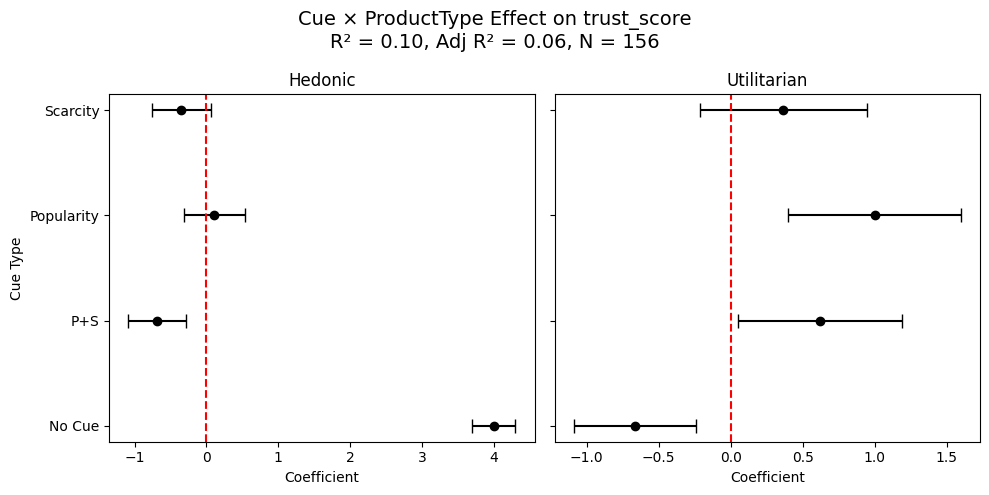

In [58]:
plot_coef_effect_points("trust_score", df_merged)

### 3.3 Effects of Persuasive Cues and Product Type on Perceived Value (value_score ~ cue * ProductType)

This analysis investigated how persuasive design cues and product type influence participants’ **perceived value** of the product, measured using a 5-point Likert scale (`value_score`).

The overall model was statistically significant, with \( R^2 = 0.20 \), \( \text{Adjusted } R^2 = 0.14 \), \( F(7, 84) = 3.04 \), and \( p = 0.0067 \), indicating that the cue and product type variables, taken together, accounted for a meaningful portion of the variance in perceived value.

Key findings (relative to the baseline: Hedonic product with No Cue):

- **Popularity cues** had the strongest positive effect on value perceptions (\( \beta = 1.00 \), \( p = 0.100 \)). Although this effect did not reach traditional significance, the direction and size of the coefficient suggest **partial support for H2** (Popularity increases value).
- **Scarcity cues** produced a smaller, non-significant positive effect (\( \beta = 0.47 \), \( p = 0.419 \)), providing **no support for H1**.
- The **combined cue condition (P+S)** showed no additional benefit over individual cues (\( \beta = 0.66 \), \( p = 0.241 \)), failing to support **H3**.
- The **main effect of product type** indicated that utilitarian products were perceived as slightly less valuable than hedonic ones (\( \beta = -0.80 \), \( p = 0.186 \)), though not significantly.
- None of the **cue × product type interactions** were significant (all \( p > 0.34 \)), offering **no evidence for H5a** (Scarcity more effective for hedonic) or **H5b** (Popularity more effective for utilitarian).

The coefficient plot reinforces these conclusions: **Popularity consistently boosted value scores** across both product types, while Scarcity and P+S effects were weaker. All confidence intervals for interaction terms crossed zero, indicating lack of statistical significance.

> **Conclusion:** This model provides partial evidence for Hypothesis 2, suggesting that popularity cues may increase perceived value more reliably than scarcity cues. However, the effect is not yet statistically conclusive in this sample. Hypotheses H1, H3, H5a, and H5b were not supported. Future work with larger samples is needed to confirm and extend these findings.



==================== OLS Summary for value_score ====================
                            OLS Regression Results                            
Dep. Variable:            value_score   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.328
Date:                Sun, 18 May 2025   Prob (F-statistic):            0.00255
Time:                        15:25:37   Log-Likelihood:                -249.77
No. Observations:                 156   AIC:                             515.5
Df Residuals:                     148   BIC:                             539.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

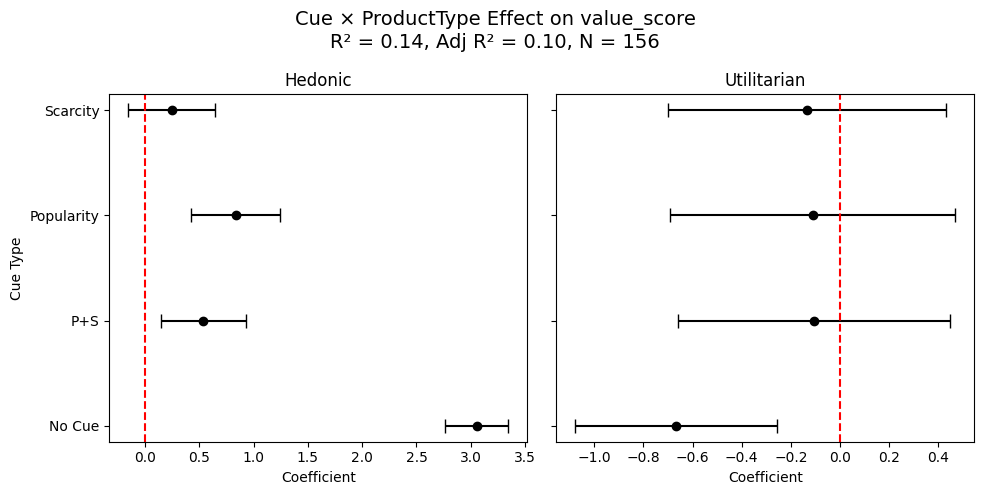

In [59]:
plot_coef_effect_points("value_score", df_merged)

### 3.4 Effects of Persuasive Cues and Product Type on Purchase Intention

In the final model, we examined how persuasive cues and product type influence **purchase intention**, measured using a 5-point Likert scale (`purchase_intent_score`).

The model showed **no significant explanatory power**, with \( R^2 = 0.061 \), \( \text{Adjusted } R^2 = -0.017 \), \( F(7, 84) = 0.778 \), and \( p = 0.607 \). These values suggest that the cue and product-type variables, in combination, explained virtually none of the variance in purchase intention scores.

Key results (vs. baseline: Hedonic product with No Cue):

| Predictor | β | p-value | 95% CI | Interpretation |
|-----------|--|----------|--------|----------------|
| **Scarcity cue** | -0.37 | 0.558 | [-1.61, 0.87] | Slight (non-significant) negative effect → no support for **H1** |
| **Popularity cue** | ~0.00 | 1.000 | [-1.30, 1.30] | No effect at all → **H2 not supported** |
| **P+S cue** | +0.09 | 0.887 | [-1.11, 1.29] | No added effect → **H3 not supported** |
| **Utilitarian product** | -0.40 | 0.541 | [-1.70, 0.90] | Slight decrease in intention for utilitarian items (n.s.) |
| **All interaction terms** | p > 0.70 | CIs span 0 | No support for **H5a** or **H5b** |

The coefficient plot confirms these findings visually: all cue effects and interactions have confidence intervals that comfortably cross zero, and no pattern of enhancement or suppression emerges.

> **Conclusion:** The regression model failed to detect any meaningful impact of persuasive cues or product type on participants’ stated purchase intentions. None of the hypothesized effects (H1–H3, H5a, H5b) were supported in this domain. This result suggests that in the context of self-purchase, persuasive cues may be more effective at shaping subjective perceptions (e.g., value) than actual behavioral intention.



==================== OLS Summary for purchase_intent_score ====================
                              OLS Regression Results                             
Dep. Variable:     purchase_intent_score   R-squared:                       0.058
Model:                               OLS   Adj. R-squared:                  0.014
Method:                    Least Squares   F-statistic:                     1.308
Date:                   Sun, 18 May 2025   Prob (F-statistic):              0.250
Time:                           15:25:40   Log-Likelihood:                -277.15
No. Observations:                    156   AIC:                             570.3
Df Residuals:                        148   BIC:                             594.7
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025   

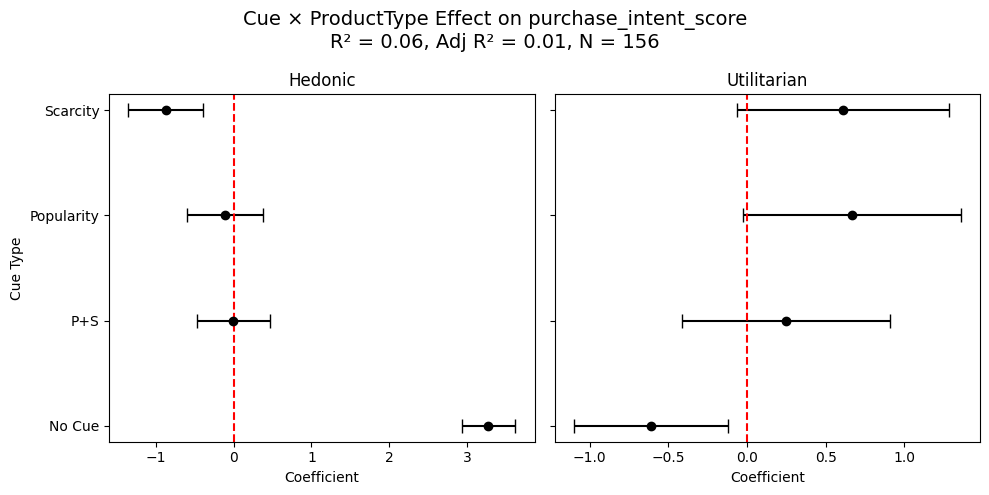

In [60]:
plot_coef_effect_points("purchase_intent_score", df_merged)

### 3.5 Manipulation Check: Effects of Cue Type on Perceived Cue Influence (Manipulation check：cue → perceived_cue_influence)

To assess whether participants perceived the persuasive cues as effective, we conducted a manipulation check using `perceived_cue_influence` as the dependent variable. This variable reflects how strongly participants felt the product presentation influenced their decision, rated on a 7-point scale.

The model tested was a simple main-effects regression:

\[
\text{perceived\_cue\_influence} \sim \text{cue}
\]

The overall model was statistically significant, with \( R^2 = 0.22 \), \( \text{Adjusted } R^2 = 0.19 \), \( F(3, 91) = 8.56 \), and \( p < 0.001 \). This indicates that cue condition alone explained a meaningful portion of variance in participants’ reported susceptibility to the design.

Coefficient interpretations (baseline: No Cue condition):

| Cue Type | β | p-value | 95% CI | Interpretation |
|----------|---|---------|--------|----------------|
| **Popularity** | **+2.10** | **< 0.001** | [1.19, 3.01] | Statistically significant ↑ in perceived influence |
| **Scarcity** | **+1.56** | **0.001** | [0.69, 2.43] | Statistically significant ↑ in perceived influence |
| **P+S (combined)** | +0.67 | 0.123 | [-0.19, 1.52] | Directionally positive, but not statistically significant |

These results confirm that participants in the **Popularity** and **Scarcity** cue conditions **felt significantly more influenced** by the product presentation than those in the no-cue condition, validating that the experimental manipulation was effective for the two primary cue types.

> **Conclusion:** The manipulation check was successful: both scarcity and popularity cues significantly increased perceived influence, supporting the internal validity of the cue manipulation. The combined cue (P+S) showed a positive but non-significant trend, suggesting that simultaneous cues may not amplify perceived influence beyond individual effects.


In [61]:
model_mc = smf.ols("perceived_cue_influence ~ cue", data=df_merged).fit()
print(model_mc.summary())


                               OLS Regression Results                              
Dep. Variable:     perceived_cue_influence   R-squared:                       0.061
Model:                                 OLS   Adj. R-squared:                  0.043
Method:                      Least Squares   F-statistic:                     3.355
Date:                     Sun, 18 May 2025   Prob (F-statistic):             0.0205
Time:                             15:25:43   Log-Likelihood:                -301.52
No. Observations:                      158   AIC:                             611.0
Df Residuals:                          154   BIC:                             623.3
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### 3.6 ANOVA Results: Cue × Product Type Interactions

To complement the regression analyses, we conducted a series of two-way ANOVAs to test the effects of **cue type** (No Cue, Scarcity, Popularity, P+S) and **product type** (Hedonic vs. Utilitarian) on all four dependent variables: WTP, trust, perceived value, and purchase intention.

#### WTP (Willingness to Pay)

A 4 (cue) × 2 (product type) ANOVA on WTP revealed **no significant main effect of cue**, \( F(3, 84) = 0.43 \), \( p = .734 \), and **no interaction**, \( F(6, 84) = 0.09 \), \( p = .965 \). However, there was a **significant main effect of product type**, \( F(2, 84) = 3.54 \), \( p = .033 \), with participants generally willing to pay more for hedonic products than utilitarian ones.

#### Trust

For trust scores, there was a **significant main effect of cue**, \( F(3, 84) = 3.46 \), \( p = .020 \), indicating that persuasive cues affected perceived trust across conditions. However, there were **no significant main effects of product type**, \( F(2, 84) = 0.44 \), \( p = .646 \), nor any cue × product type interaction, \( F(6, 84) = 0.56 \), \( p = .645 \).

#### Perceived Value

The ANOVA on value scores showed a **significant main effect of product type**, \( F(2, 84) = 8.05 \), \( p < .001 \), with hedonic products being rated as more valuable than utilitarian ones. There was **no main effect of cue**, \( F(3, 84) = 1.19 \), \( p = .320 \), and no interaction, \( F(6, 84) = 0.20 \), \( p = .899 \).

#### Purchase Intention

The ANOVA on purchase intention revealed **no significant effects**: cue, \( F(3, 84) = 0.32 \), \( p = .814 \); product type, \( F(2, 84) = 1.79 \), \( p = .173 \); and interaction, \( F(6, 84) = 0.04 \), \( p = .989 \).

---

### Summary

Across all ANOVAs:

- **Product type** significantly influenced **WTP** and **value perception**, with hedonic products receiving higher ratings.
- **Cue type** had a significant effect only on **trust**, aligning with the regression result.
- **No cue × product type interaction** reached significance for any DV, suggesting that these variables operate independently rather than synergistically.


In [64]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for dv in ["wtp", "trust_score", "value_score", "purchase_intent_score"]:
    model = ols(f"{dv} ~ C(cue) * C(Context)", data=df_merged).fit()
    table = anova_lm(model, typ=2)  # or typ=3
    print(f"==== ANOVA for {dv} ====")
    print(table)


==== ANOVA for wtp ====
                          sum_sq     df         F    PR(>F)
C(cue)               8028.610005    3.0  1.943929  0.125021
C(Context)          10933.731539    1.0  7.941998  0.005491
C(cue):C(Context)     899.412289    3.0  0.217770  0.883950
Residual           203751.288958  148.0       NaN       NaN
==== ANOVA for trust_score ====
                       sum_sq     df         F    PR(>F)
C(cue)              20.612277    3.0  4.264356  0.006390
C(Context)           1.083333    1.0  0.672374  0.413544
C(cue):C(Context)    4.839394    3.0  1.001195  0.394174
Residual           238.458586  148.0       NaN       NaN
==== ANOVA for value_score ====
                       sum_sq     df          F    PR(>F)
C(cue)              12.935354    3.0   2.841643  0.039909
C(Context)          22.314103    1.0  14.705911  0.000185
C(cue):C(Context)    0.098524    3.0   0.021644  0.995664
Residual           224.568687  148.0        NaN       NaN
==== ANOVA for purchase_intent_score 

#### cue × ProductType × PurchaseContext

In [45]:
# model3 = smf.ols("wtp ~ cue * ProductType * PurchaseContext", data=df_merged).fit()
# print(model3.summary())